## Exploratory Data Analysis from 538 dataset

Objective: Find possible ways to outsmart the betting market

### Imports and basic feature creation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv')

def get_result(row):
    if pd.isnull(row['score1']):
        return np.nan
    if row['score1'] > row['score2']:
        return 'H'
    elif row['score1'] < row['score2']:
        return 'A'
    else:
        return 'D'

df = df[df['league'] != 'UEFA Champions League']    
df = df[df['league'] != 'UEFA Europa League'] 
df = df[df['league'] != 'UEFA Europa Conference League'] 
# Aplicar a função para criar a coluna 'result'
df['result'] = df.apply(get_result, axis=1)

df.loc[df['result'] == 'H', 'home_Points'] = 3
df.loc[df['result'] == 'D', 'home_Points'] = 1
df.loc[df['result'] == 'A', 'home_Points'] = 0
df.loc[df['result'] == 'A', 'away_Points'] = 3
df.loc[df['result'] == 'D', 'away_Points'] = 1
df.loc[df['result'] == 'H', 'away_Points'] = 0



In [2]:
woman_leagues = [x for x in df['league'].unique() if 'Women' in x or 'NWSL' in x]
man_leagues = [x for x in df['league'].unique() if x not in woman_leagues] 

Championships can be divided in the ones that are played in 1 year (Mar - Nov) or in 2 different year (Aug - May). Let's find out which ones:

In [3]:
filtered_df = df[df['league'].isin(man_leagues)].copy()
filtered_df = filtered_df[filtered_df['season'] == 2022]
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year
c = filtered_df.groupby('league')['year'].unique().reset_index(name='Years')

one_year_leagues = []
two_year_leagues = []

for index, row in c.iterrows():
    if len(row['Years']) == 1:
        one_year_leagues.append(row['league'])
    elif len(row['Years']) == 2:
        two_year_leagues.append(row['league'])

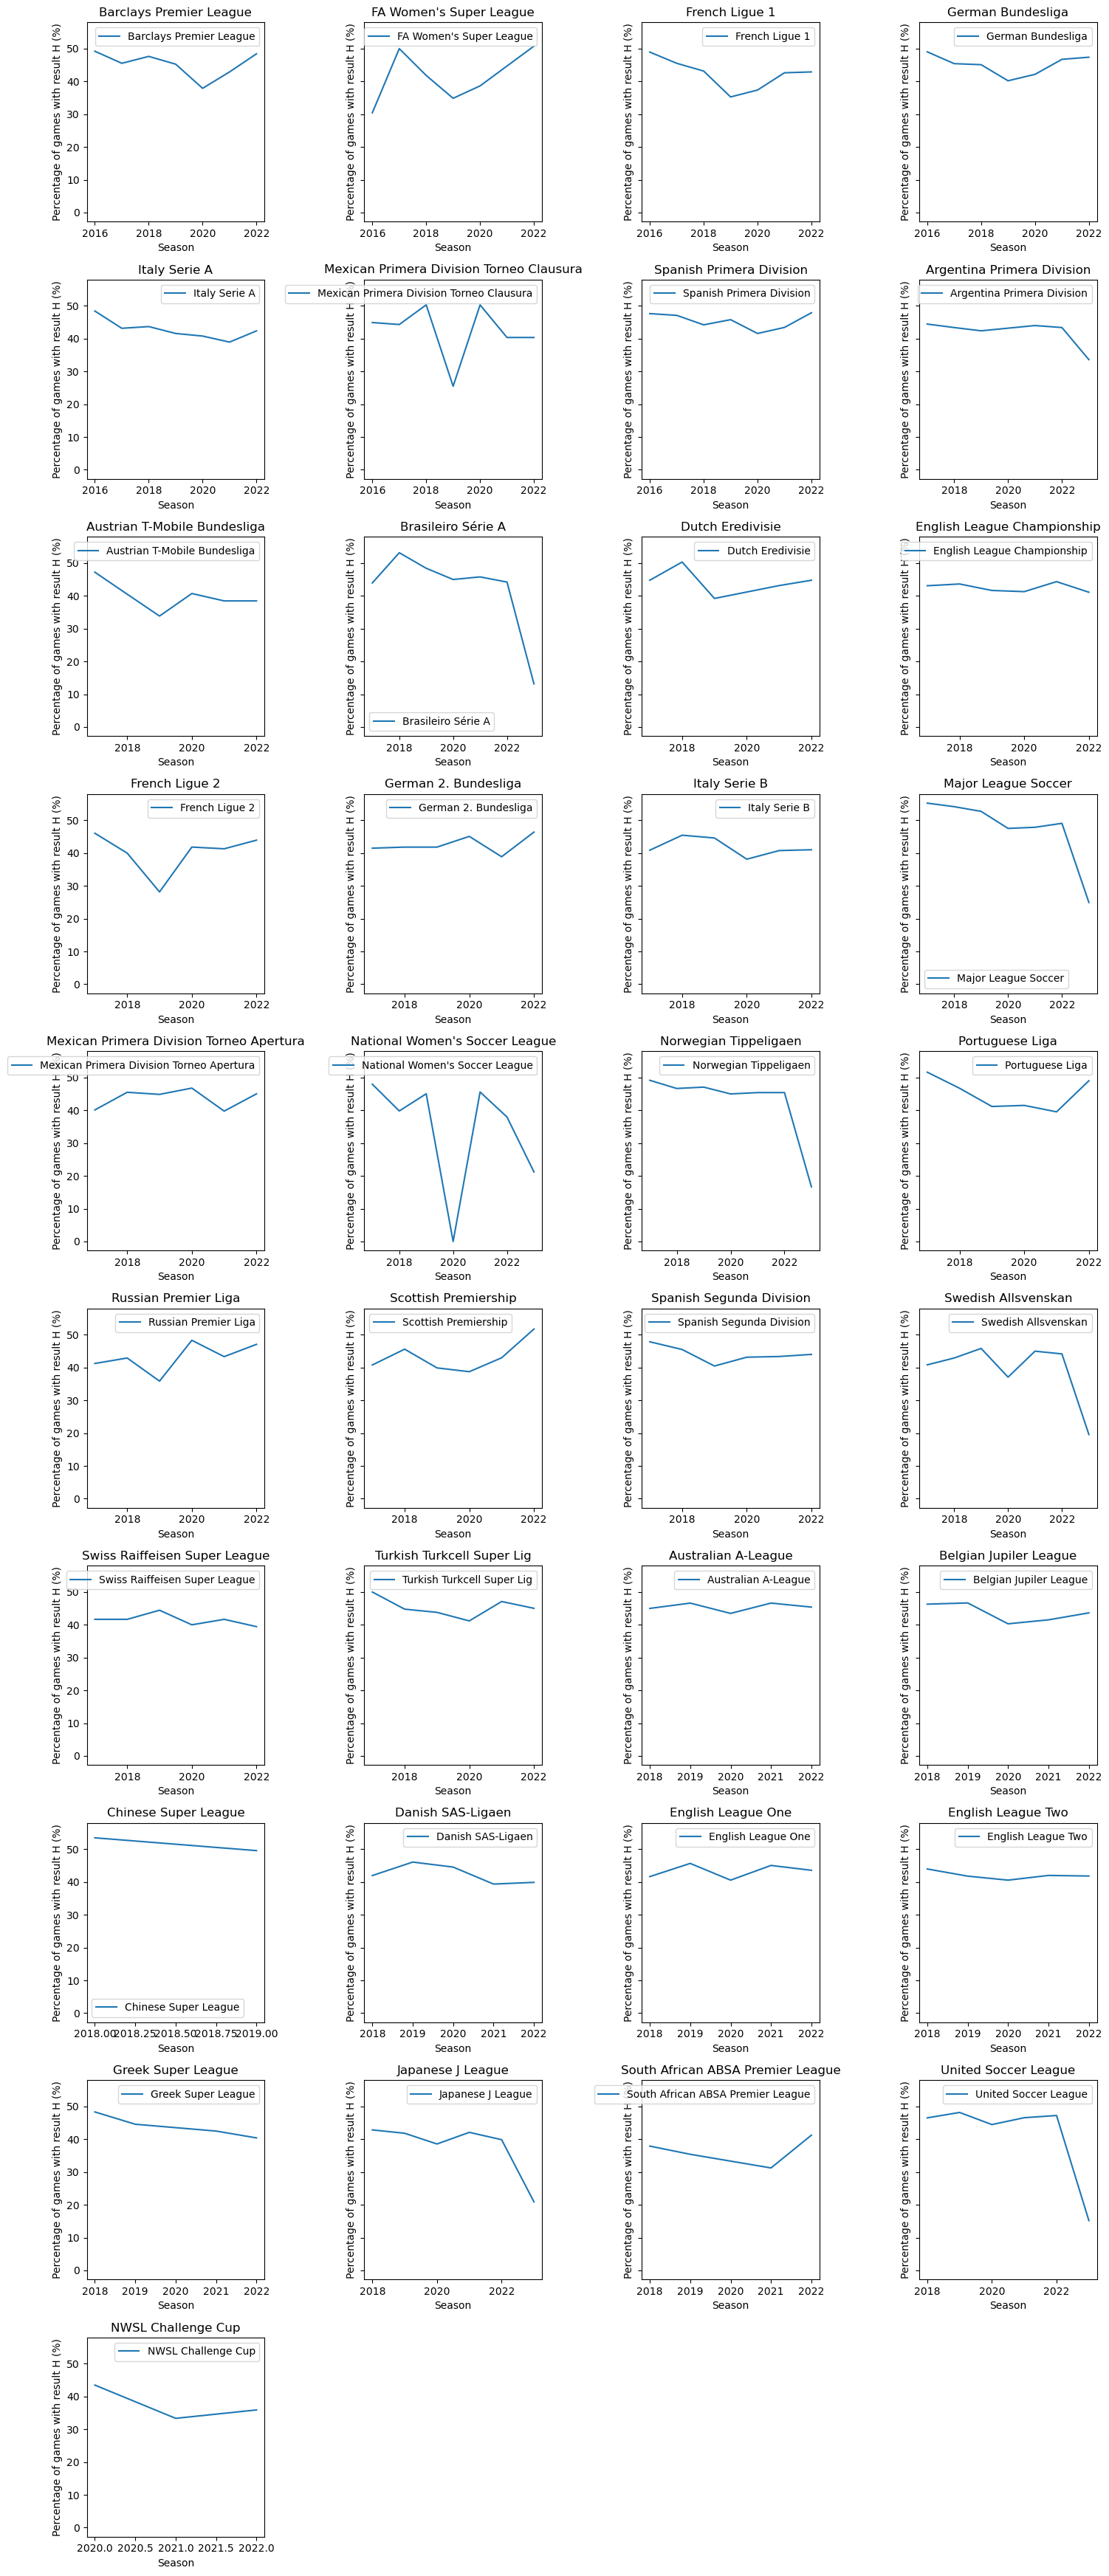

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df['Percentage_H'] = 100 * (df['result'] == 'H').groupby([df['season'], df['league']]).transform('mean')
df['Percentage_A'] = 100 * (df['result'] == 'H').groupby([df['season'], df['league']]).transform('mean')

average_percentage = df.groupby(['season', 'league'])['Percentage_H'].mean().reset_index()

leagues = average_percentage['league'].unique()
num_leagues = len(leagues)

num_rows = (num_leagues - 1) // 4 + 1
num_cols = min(num_leagues, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, (3.5)*num_rows), sharey=True)
axes = axes.flatten()

for i, league in enumerate(leagues):
    ax = axes[i]
    group = average_percentage[average_percentage['league'] == league]
    ax.plot(group['season'], group['Percentage_H'], label=league)
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage of games with result H (%)')
    ax.set_title(f'{league}')
    ax.legend()

# Remove empty subplots
if num_leagues < len(axes):
    for j in range(num_leagues, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

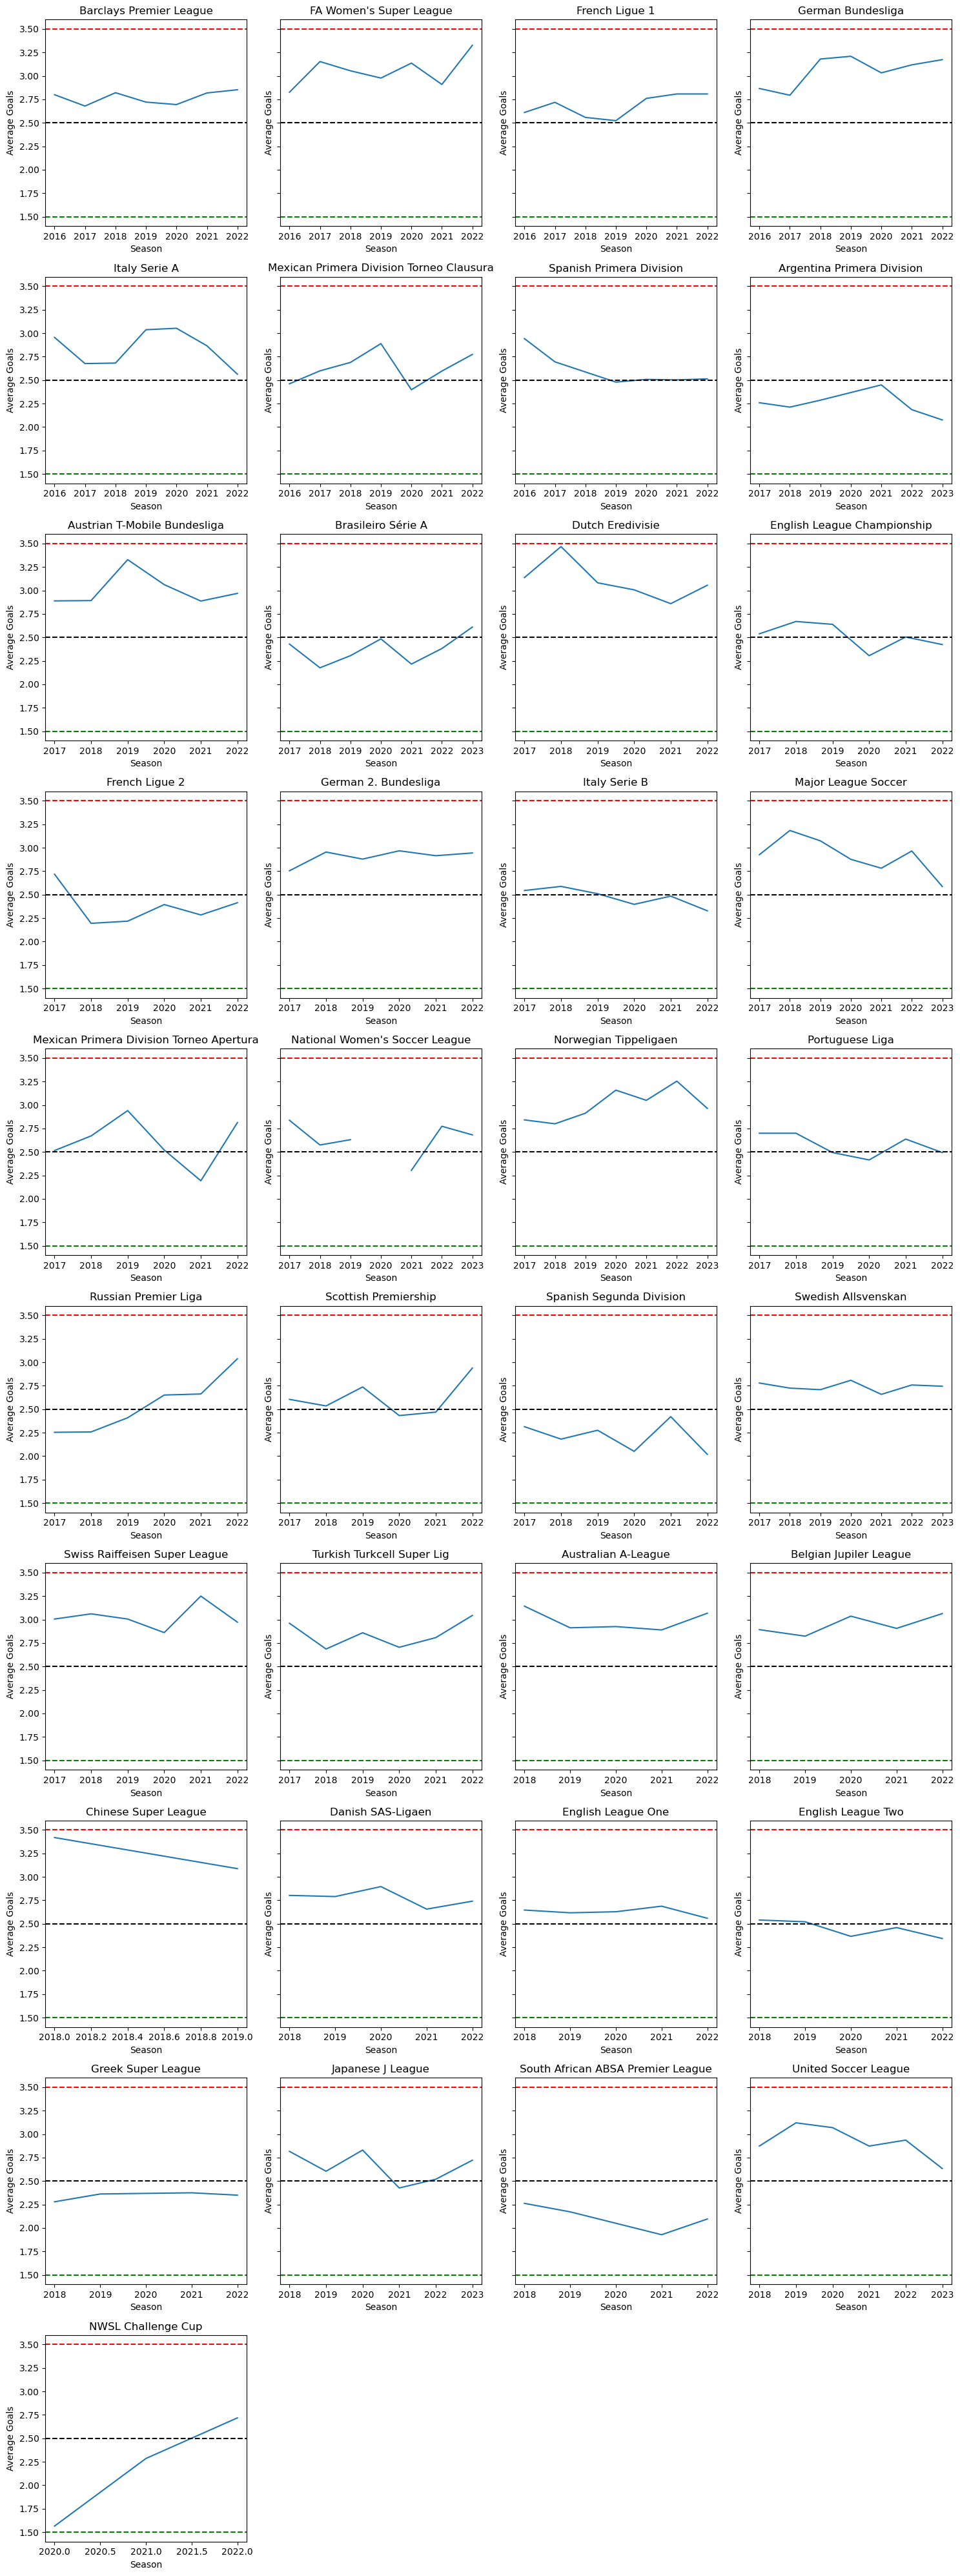

In [5]:
import matplotlib.pyplot as plt

df['goals_total'] = df['score1'] + df['score2']

average_percentage = df.groupby(['season', 'league'])['goals_total'].mean().reset_index()

leagues = average_percentage['league'].unique()
num_leagues = len(leagues)

num_rows = (num_leagues - 1) // 4 + 1
num_cols = min(num_leagues, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=True)
axes = axes.flatten()

for i, league in enumerate(leagues):
    ax = axes[i]
    group = average_percentage[average_percentage['league'] == league]
    ax.plot(group['season'], group['goals_total'], label=league)
    ax.set_xlabel('Season')
    ax.set_ylabel('Average Goals')
    ax.set_title(f'{league}')
    ax.legend().remove()

    # Add green lines at y=1.5
    ax.axhline(y=1.5, color='green', linestyle='--')

    # Add yellow lines at y=2.5
    ax.axhline(y=2.5, color='black', linestyle='--')

    # Add red lines at y=3.5
    ax.axhline(y=3.5, color='red', linestyle='--')

# Remove empty subplots
if num_leagues < len(axes):
    for j in range(num_leagues, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Home Win Percentage by League')

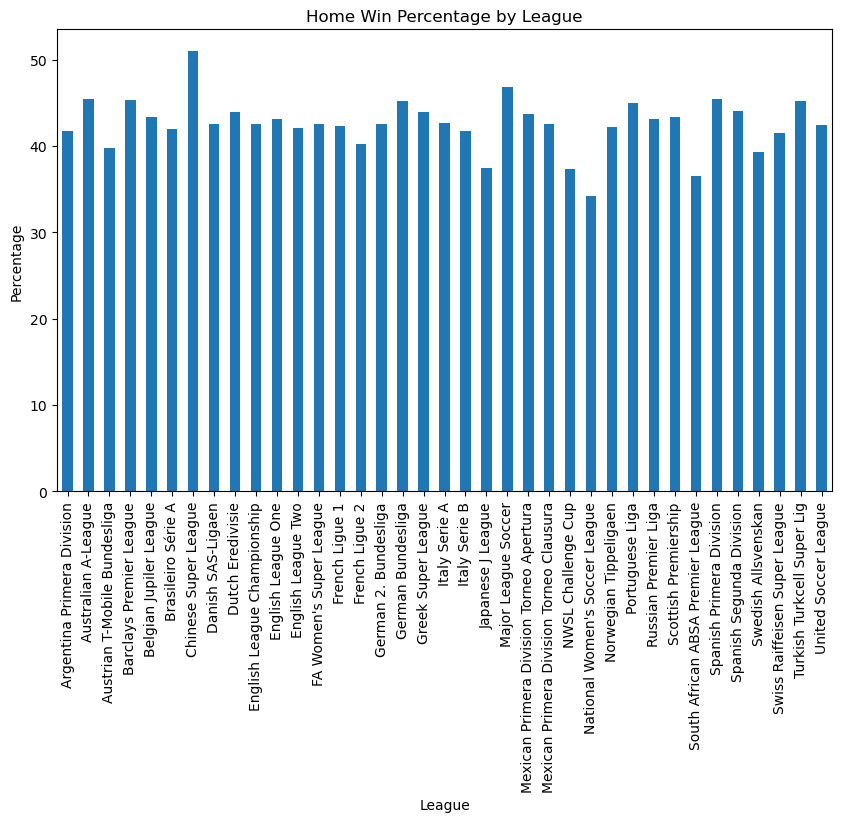

In [6]:
# Agrupar por 'league' e calcular a contagem total de jogos
total_counts = df.groupby('league').size()

# Filtrar apenas as vitórias da equipe da casa
home_wins = df[df['result'] == 'H']

# Agrupar por 'league' e contar as vitórias da equipe da casa
home_win_counts = home_wins.groupby('league').size()

# Calcular a porcentagem de vitórias da equipe da casa
home_win_percentage = (home_win_counts / total_counts) * 100

# Plotar o gráfico de barras das porcentagens de vitórias da equipe da casa
ax = home_win_percentage.plot(kind='bar', figsize=(10, 6))

# Configurar os rótulos dos eixos e o título
plt.xlabel('League')
plt.ylabel('Percentage')
plt.title('Home Win Percentage by League')

Text(0.5, 1.0, 'Draw Percentage by League')

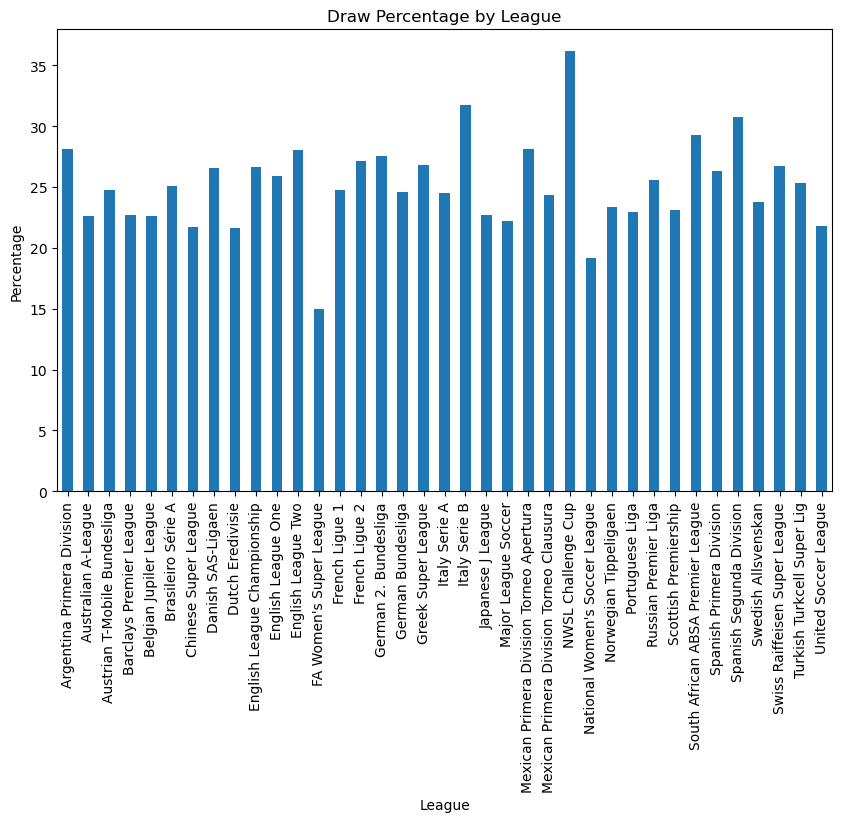

In [7]:
# Agrupar por 'league' e calcular a contagem total de jogos
total_counts = df.groupby('league').size()

# Filtrar apenas as vitórias da equipe da casa
home_wins = df[df['result'] == 'D']

# Agrupar por 'league' e contar as vitórias da equipe da casa
home_win_counts = home_wins.groupby('league').size()

# Calcular a porcentagem de vitórias da equipe da casa
home_win_percentage = (home_win_counts / total_counts) * 100

# Plotar o gráfico de barras das porcentagens de vitórias da equipe da casa
ax = home_win_percentage.plot(kind='bar', figsize=(10, 6))

# Configurar os rótulos dos eixos e o título
plt.xlabel('League')
plt.ylabel('Percentage')
plt.title('Draw Percentage by League')

In [8]:
def movingAveragesFoulsCards(team):
    dfHomeGames = df[df['team1'] == team]
    dfAwayGames = df[df['team2'] == team]
    dfTotal = pd.concat([dfHomeGames,dfAwayGames])

    dfTotal.sort_index(inplace=True)

    dfTotal['Points'] = dfTotal.apply(lambda row: row['home_Points'] if row['team1'] == team else row['away_Points'],axis=1)
    
    coluna = 'Points'
    
    rows_to_update_home = dfHomeGames.index
    rows_to_update_away = dfAwayGames.index
    
    dfTotal[f'{coluna}_MA5'] = dfTotal[coluna].rolling(5, closed='left').mean()
    dfTotal[f'{coluna}_MA17'] = dfTotal[coluna].rolling(17, closed='left').mean()
    dfTotal[f'{coluna}_MA34'] = dfTotal[coluna].rolling(34, closed='left').mean()
    
    df.loc[rows_to_update_home, f'{coluna}_home_MA5'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA5']
    df.loc[rows_to_update_away, f'{coluna}_away_MA5'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA5']
    df.loc[rows_to_update_home, f'{coluna}_home_MA17'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA17']
    df.loc[rows_to_update_away, f'{coluna}_away_MA17'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA17']
    df.loc[rows_to_update_home, f'{coluna}_home_MA34'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA34']
    df.loc[rows_to_update_away, f'{coluna}_away_MA34'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA34']

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

for team in df['team1'].unique():
    movingAveragesFoulsCards(team)


In [9]:
df.groupby('Points_home_MA5')['result'].value_counts(normalize=True)

Points_home_MA5  result
0.0              A         0.437355
                 H         0.292343
                 D         0.270302
0.2              A         0.399336
                 H         0.358240
                 D         0.242424
0.4              H         0.384494
                 A         0.335047
                 D         0.280459
0.6              H         0.366977
                 A         0.366738
                 D         0.266285
0.8              H         0.389610
                 A         0.352441
                 D         0.257949
1.0              H         0.397212
                 A         0.327992
                 D         0.274796
1.2              H         0.421843
                 A         0.307330
                 D         0.270827
1.4              H         0.441219
                 A         0.292586
                 D         0.266195
1.6              H         0.454226
                 A         0.277280
                 D         0.268494
1.8 

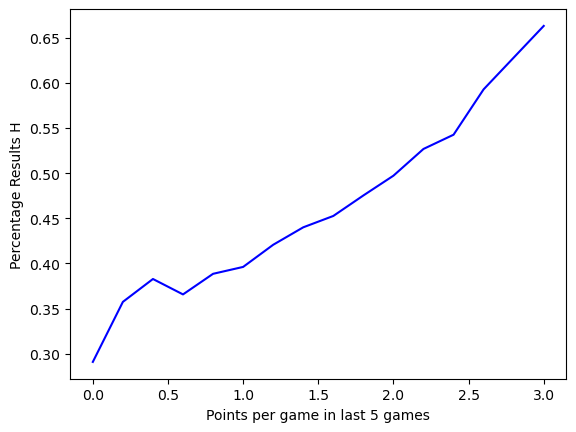

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado 'dados' com as colunas 'Pontos_home_MA5' e 'result'

# Agrupar os dados por 'Pontos_home_MA5' e calcular a média da coluna 'result' igual a 'H'
grouped_data = df.groupby('Points_home_MA5')['result'].apply(lambda x: (x == 'H').mean()).reset_index()

# Plotar o gráfico de linhas
fig, ax1 = plt.subplots()

# Gráfico de linhas (porcentagem de vezes que result == 'H')
ax1.plot(grouped_data['Points_home_MA5'], grouped_data['result'], color='blue')
ax1.set_ylabel('Percentage Results H')
ax1.set_xlabel('Points per game in last 5 games')

plt.show()


In [11]:
grouped_data = df.groupby(['league','Points_home_MA5','season'])[['Percentage_H','prob1']].mean()
grouped_data['dif'] = grouped_data['Percentage_H'] - (grouped_data['prob1']*100)

In [12]:
grouped_data.sort_values(by='dif').tail(20)

Percentage_H  \
league                                   Points_home_MA5 season                 
Spanish Primera Division                 0.0             2016       47.631579   
Barclays Premier League                  0.0             2016       49.210526   
FA Women's Super League                  1.4             2022       50.757576   
                                         1.0             2018       41.818182   
Austrian T-Mobile Bundesliga             0.6             2017       47.222222   
Russian Premier Liga                     0.0             2022       47.083333   
Swiss Raiffeisen Super League            0.0             2019       44.444444   
South African ABSA Premier League        0.2             2018       37.916667   
Swedish Allsvenskan                      0.0             2021       45.000000   
Dutch Eredivisie                         0.0             2018       50.326797   
United Soccer League                     0.0             2018       46.527778   
French Ligue 2                           0.0             2020       41.842105   
United Soccer League                     0.0             2019       48.177496   
Russian Premier Liga                     0.0             2018       42.916667   
Turkish Turkcell Super Lig               0.0             2017       50.000000   
Mexican Primera Division Torneo Apertura 0.0             2019       44.864865   
Swedish Allsvenskan                      0.0             2019       45.833333   
Austrian T-Mobile Bundesliga             0.0             2017       47.222222   
FA Women's Super League                  0.0             2022       50.757576   
National Women's Soccer League           0.4             2017       47.967480   

                                                                    prob1  \
league                                   Points_home_MA5 season             
Spanish Primera Division                 0.0             2016    0.253500   
Barclays Premier League                  0.0             2016    0.267480   
FA Women's Super League                  1.4             2022    0.279350   
                                         1.0             2018    0.189075   
Austrian T-Mobile Bundesliga             0.6             2017    0.240312   
Russian Premier Liga                     0.0             2022    0.238100   
Swiss Raiffeisen Super League            0.0             2019    0.211300   
South African ABSA Premier League        0.2             2018    0.145000   
Swedish Allsvenskan                      0.0             2021    0.210733   
Dutch Eredivisie                         0.0             2018    0.257333   
United Soccer League                     0.0             2018    0.216588   
French Ligue 2                           0.0             2020    0.162800   
United Soccer League                     0.0             2019    0.225283   
Russian Premier Liga                     0.0             2018    0.170300   
Turkish Turkcell Super Lig               0.0             2017    0.232600   
Mexican Primera Division Torneo Apertura 0.0             2019    0.178750   
Swedish Allsvenskan                      0.0             2019    0.173750   
Austrian T-Mobile Bundesliga             0.0             2017    0.187200   
FA Women's Super League                  0.0             2022    0.210943   
National Women's Soccer League           0.4             2017    0.115400   

                                                                       dif  
league                                   Points_home_MA5 season             
Spanish Primera Division                 0.0             2016    22.281579  
Barclays Premier League                  0.0             2016    22.462526  
FA Women's Super League                  1.4             2022    22.822576  
                                         1.0             2018    22.910682  
Austrian T-Mobile Bundesliga             0.6             2017    23.190972  
Russian Premier Liga                     0.0    

In [13]:
equipas0 = df[df['Points_home_MA5'] == 0.0]
equipas0[equipas0['score1'].isna()]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,away_Points,Percentage_H,Percentage_A,goals_total,Points_home_MA5,Points_away_MA5,Points_home_MA17,Points_away_MA17,Points_home_MA34,Points_away_MA34
31057,2019,2020-03-14,1843,French Ligue 1,Toulouse,Metz,59.96,49.87,0.2716,0.4572,...,NaN,35.263158,35.263158,NaN,0.0,1.4,0.058824,1.352941,0.470588,1.382353
31085,2019,2020-03-15,1832,Belgian Jupiler League,Waasland-Beveren,KAA Gent,28.46,64.08,0.1187,0.7144,...,NaN,46.666667,46.666667,NaN,0.0,1.4,0.764706,1.941176,0.735294,1.882353
67532,2023,2023-06-17,2160,United Soccer League,Birmingham Legion FC,Indy Eleven,15.73,11.90,0.4920,0.2414,...,NaN,15.196078,15.196078,NaN,0.0,1.4,1.176471,1.294118,1.558824,1.058824
67577,2023,2023-06-22,2105,Brasileiro Série A,Vasco da Gama,Goiás,51.02,39.59,0.5881,0.1825,...,NaN,13.157895,13.157895,NaN,0.0,1.0,0.705882,0.941176,0.852941,1.088235


In [14]:
zero_elements = grouped_data.loc[:,0.0,:,:]['dif']
zero_elements[zero_elements < 0.0]

#Season and leagues where it didn't give profit
# 17 didn't give profit, 174 did. Probability of choosing random league and season to do this and be able to get profit ~91.1%

league                             season
Austrian T-Mobile Bundesliga       2018     -18.917179
Belgian Jupiler League             2020      -1.106970
Brasileiro Série A                 2023     -38.442105
English League Championship        2019      -4.368294
English League One                 2022     -10.189530
French Ligue 1                     2019      -0.769342
French Ligue 2                     2019      -8.547105
German 2. Bundesliga               2019      -0.899935
German Bundesliga                  2019      -5.428922
Italy Serie B                      2018      -5.455455
Japanese J League                  2018      -1.522857
                                   2023     -24.214967
Major League Soccer                2023     -21.330710
Norwegian Tippeligaen              2023     -25.103333
Russian Premier Liga               2019     -16.020021
South African ABSA Premier League  2019      -1.460000
United Soccer League               2023     -25.418922
Name: dif, dtype: float

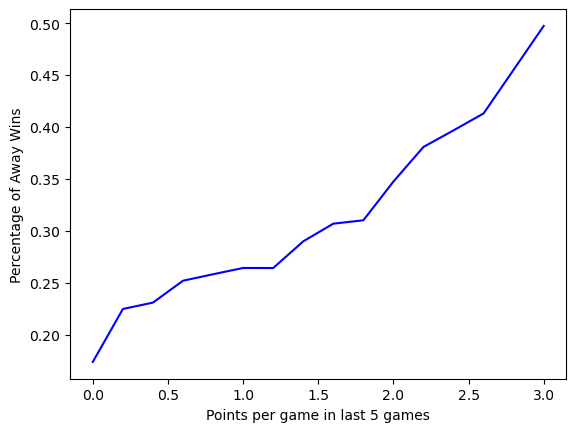

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado 'dados' com as colunas 'Pontos_home_MA5' e 'result'

# Agrupar os dados por 'Pontos_home_MA5' e calcular a média da coluna 'result' igual a 'H'
grouped_data = df.groupby('Points_away_MA5')['result'].apply(lambda x: (x == 'A').mean()).reset_index()

# Plotar o gráfico de linhas
fig, ax1 = plt.subplots()

# Gráfico de linhas (porcentagem de vezes que result == 'H')
ax1.plot(grouped_data['Points_away_MA5'], grouped_data['result'], color='blue')
ax1.set_ylabel('Percentage of Away Wins')
ax1.set_xlabel('Points per game in last 5 games')

plt.show()


In [16]:
grouped_away = df.groupby(['league','Points_away_MA5','season'])[['Percentage_A','prob2']].mean()
grouped_away['dif'] = grouped_away['Percentage_A'] - (grouped_away['prob2']*100)
grouped_away.sort_values(by='dif').tail(20)

,,,Percentage_A,prob2,dif
league,Points_away_MA5,season,,,
Major League Soccer,0.2,2017,55.242967,0.213386,33.904395
Barclays Premier League,0.0,2018,47.631579,0.137050,33.926579
Major League Soccer,0.8,2017,55.242967,0.210845,34.158421
Russian Premier Liga,0.0,2017,41.250000,0.070620,34.188000
Major League Soccer,0.0,2018,54.166667,0.198580,34.308667
Spanish Segunda Division,0.0,2017,47.863248,0.125189,35.344359
Brasileiro Série A,0.4,2018,53.157895,0.177577,35.400202
Barclays Premier League,0.0,2017,45.526316,0.100333,35.492982
Italy Serie A,0.0,2016,48.421053,0.128525,35.568553


In [17]:
zero_elements = grouped_away.loc[:,0.0,:,:]['dif']
zero_elements[zero_elements > 0.0]

#Season and leagues where it didn't give profit
# 4 didn't give profit, 189 did. Probability of choosing random league and season to do this and be able to get profit ~97.9%

league                      season
Argentina Primera Division  2017      29.819444
                            2018      15.244615
                            2019      16.091304
                            2021      13.435000
                            2022      24.366243
                                        ...    
United Soccer League        2018      31.239778
                            2019      30.240353
                            2020      21.027759
                            2021      30.992009
                            2022      20.515763
Name: dif, Length: 189, dtype: float64

In [18]:
pd.set_option('display.max_columns', 500)
